In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from dreamcoder.domains.sketch.sketchPrimitives import *
from dreamcoder.task import Program
from dreamcoder.domains.sketch.main import dreamOfSketches


In [3]:
## GOOD - write way to render this.
## hand inputing a program
from dreamcoder.domains.sketch import sketchPrimitives as T

# p = Program.parse("(lambda (L (l 2 (C $0))))")
# p = Program.parse("(lambda (C (u 4 (loop 5 (lambda (lambda (d 3 (u $1 (C $0))))) $0))))")
# p = Program.parse("(lambda (C (loop 4 (lambda (lambda (d 3 (r 2 (C $0))))) (loop 2 (lambda (lambda (r 2 (L $0))))))))")
# p = Program.parse("(lambda (loop 3 (lambda (lambda (u 2 $0))) $0))")
# p = Program.parse("(lambda (loop 3 (lambda (lambda (u $1 $0)) (u 5 $0))))")

# (u 4 (r 2 x))
p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 k)) (C (loop 4 (lambda (i k) (d i (L k))) k))))")
# p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 2 (u 2 (L x)))) (C (l 2 (LL x)))))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=(-3,3), history=[]))
print(sketch.history)
print(trace)

[((-3, 3), ''), ((-2, 3), ''), ((-1, 3), ''), ((0, 3), ''), ((0, 3), 'C'), ((0, 3), ''), ((0, 3), 'L'), ((0, 2), ''), ((0, 2), 'L'), ((0, 0), ''), ((0, 0), 'L'), ((0, -3), ''), ((0, -3), 'L')]
[((0, 3), 'C'), ((0, 3), 'L'), ((0, 2), 'L'), ((0, 0), 'L'), ((0, -3), 'L')]


In [4]:
p = Program.parseHumanReadable("(lambda (k) (l 2 (l 2 ( C (l 2 k) ))))")
# p = Program.parseHumanReadable("(lambda (x) (embed (lambda (x) (r 2 (u 2 (L x)))) (C (l 2 (LL x)))))")
sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=(-3,3), history=[]))
print(sketch.history)
print(trace)
renderPlan(sketch)

[((-3, 3), ''), ((-5, 3), ''), ((-7, 3), ''), ((-7, 3), 'C'), ((-9, 3), '')]
[((-7, 3), 'C')]
[((-3.3000000000000003, 3), ''), ((-5.5, 3), ''), ((-7.700000000000001, 3), ''), ((-7.700000000000001, 3), 'C'), ((-9.9, 3), '')]


[((-3.3000000000000003, 3), ''), ((-5.5, 3), ''), ((-7.700000000000001, 3), ''), ((-7.700000000000001, 3), 'C'), ((-9.9, 3), '')]


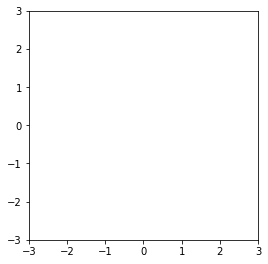

In [5]:
# -- function to render program
from dreamcoder.domains.sketch.sketchPrimitives import renderPlan
renderPlan(sketch)


[((-2, 2), ''), ((-2, 2), 'LL'), ((-1, 2), ''), ((-1, 2), 'LL'), ((0, 2), ''), ((0, 2), 'LL'), ((1, 2), ''), ((1, 2), 'LL'), ((2, 2), ''), ((-2, 2), ''), ((-2, 1), ''), ((-2, 1), 'L'), ((-2, 0), ''), ((-2, 0), 'C'), ((-2, 2), ''), ((-1, 2), ''), ((-1, 1), ''), ((-1, 1), 'L'), ((-1, 0), ''), ((-1, 0), 'C'), ((-1, 2), ''), ((0, 2), ''), ((0, 1), ''), ((0, 1), 'L'), ((0, 0), ''), ((0, 0), 'C'), ((0, 2), ''), ((1, 2), ''), ((1, 1), ''), ((1, 1), 'L'), ((1, 0), ''), ((1, 0), 'C'), ((1, 2), ''), ((2, 2), '')]
---
[((-2, 2), 'LL'), ((-1, 2), 'LL'), ((0, 2), 'LL'), ((1, 2), 'LL'), ((-2, 1), 'L'), ((-2, 0), 'C'), ((-1, 1), 'L'), ((-1, 0), 'C'), ((0, 1), 'L'), ((0, 0), 'C'), ((1, 1), 'L'), ((1, 0), 'C')]
[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), ''), ((-2.2, 1), ''), ((-2.2, 1), 'L'), ((-2.2, 0), ''), ((-2.2, 0), 'C'), ((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 1), ''), (

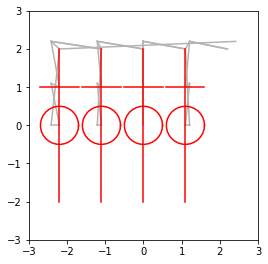

In [6]:
## making supervised tasks
starthand = (-2,2)

# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 k)) (C (loop 4 (lambda (i k) (d i (L k))) k))))")
# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (r 1 (C k))) k))")

grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"

grid_embed = f"embed (lambda (k) {grid})"
# vert1 = "embed (lambda (k) (r 2 k))"
vert1 = "embed (lambda (k) (d 1 (C (d 1 (L k)))))"

vertG = lambda p1, p2: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} k)))))"

# p = Program.parseHumanReadable(f"(lambda (k) {grid})")
# p = Program.parseHumanReadable(f"(lambda (k) ({grid_embed} (d 1 (C (d 1 (C k))))))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (d 1 (C (d 1 (C k))))))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) ({vert1} (r 1 ({vert1} ((r 1 ({vert1} ((r 1 ({vert1} (k))))))))))))")
p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vert1} (r 1 k))) k)))")
p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG('L', 'C')} (r 1 k))) k)))")

# p = Program.parseHumanReadable("(lambda (k) (loop 3 (lambda (i k) (LL (k))) k))")


sketch, trace = p.evaluate([])(T._empty_sketch)(SketchState(hand=starthand, history=[]))
print(sketch.history)
print("---")
print(trace)

renderPlan(sketch)




In [10]:
dreams = dreamOfSketches(N=10)
[print(d) for d in dreams]

(lambda (loop 2 (lambda (lambda (L (C (L (u 3 (loop 3 (lambda (lambda (r 1 (u $1 (embed (lambda (r $2 (embed (lambda (r 1 (r 3 (l $3 $0)))) $0))) (LL (embed (lambda (C (loop 2 (lambda (lambda (loop 1 (lambda (lambda $0)) $0))) (L $0)))) (LL (embed (lambda (l $2 $0)) (d 1 $0)))))))))) (embed (lambda $0) (r 3 (d $1 (u 1 (LL (d 2 (d 3 (LL $0))))))))))))))) (u 2 (C (d 1 (u 1 (u 1 (L (embed (lambda $0) (u 1 (C (u 1 $0))))))))))))
(lambda (LL (embed (lambda (r 1 (C (l 2 (LL (u 3 (C (embed (lambda (d 2 (C (L (embed (lambda (C $0)) (l 3 $0)))))) (u 3 (r 3 (loop 3 (lambda (lambda (l 2 (d 1 $0)))) (d 3 (d 2 $0))))))))))))) (LL (loop 3 (lambda (lambda (LL (LL (L (L (C (C (LL (LL (r 1 (d $1 $0)))))))))))) (loop 3 (lambda (lambda (L (loop $1 (lambda (lambda (L (l 2 (u $3 (L (l 1 (LL (loop 1 (lambda (lambda $0)) $0))))))))) (loop 1 (lambda (lambda (r $3 (u 1 $0)))) $0))))) (C (r 1 (LL (LL (u 1 (C (r 2 (l 3 (l 3 $0)))))))))))))))
(lambda $0)
(lambda (d 1 (d 2 (C (d 2 (r 1 $0))))))
(lambda (u 2 (u 1 (

[None, None, None, None, None, None, None, None, None, None]

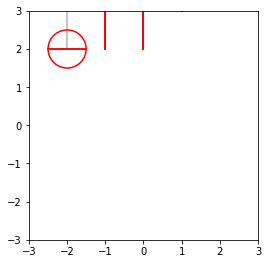

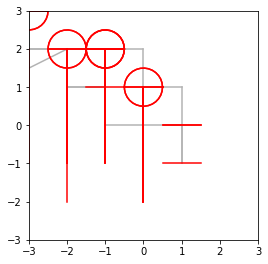

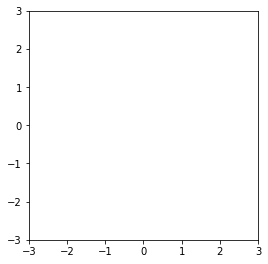

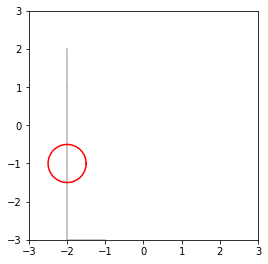

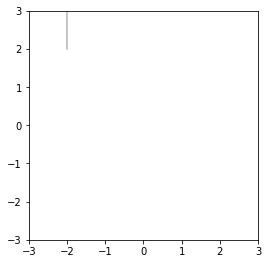

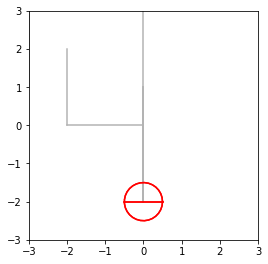

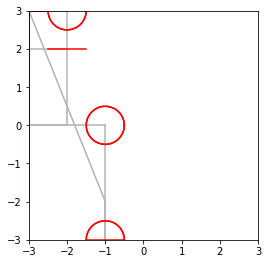

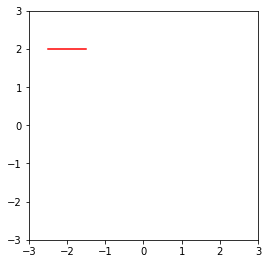

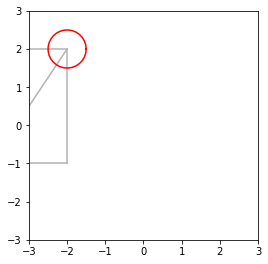

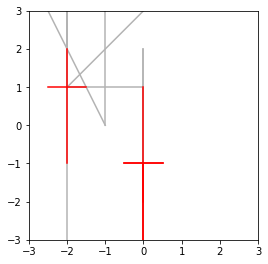

In [15]:
for d in dreams:
    renderPlan(executeSketch(d)[0])

[((-2.2, 2), ''), ((-2.2, 2), 'LL'), ((-1.1, 2), ''), ((-1.1, 2), 'LL'), ((0.0, 2), ''), ((0.0, 2), 'LL'), ((1.1, 2), ''), ((1.1, 2), 'LL'), ((2.2, 2), ''), ((-2.2, 2), ''), ((-2.2, 1), ''), ((-2.2, 1), 'L'), ((-2.2, 0), ''), ((-2.2, 0), 'L'), ((-2.2, -1), ''), ((-2.2, -1), 'L'), ((-2.2, 2), ''), ((-1.1, 2), ''), ((-1.1, 2), 'C')]


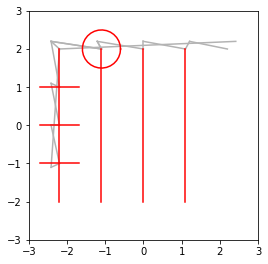

In [7]:
## making tasks - write down programs as strings

grid = "(loop 4 (lambda (i k) (LL (r 1 k))) k)"
# grid_embed = f"embed (lambda (k) {grid})"
# vert1 = "embed (lambda (k) (r 2 k))"
# vert1 = "embed (lambda (k) (d 1 (C (d 1 (L k)))))"
vertG = lambda p1, p2, p3: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k)))))))"
V = lambda p1, p2, p3: f"embed (lambda (k) (d 1 ({p1} (d 1 ({p2} (d 1 ({p3} k)))))))"

plist = ("LLL", "LCL", "_L_", "___")


# good, but loops over vertical things
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG('L', 'C', 'L')} (r 1 k))) k)))")
# p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) (loop 4 (lambda (i k) ({vertG(plist[1], 'C', 'L')} (r 1 k))) k)))")

p = Program.parseHumanReadable(f"(lambda (k) (embed (lambda (k) {grid}) ({vertG('L', 'L', 'L')} (r 1 (C k)))))")


renderPlan(executeSketch(p)[0])

